In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand

from ipywidgets import FloatSlider, interactive, IntSlider, ToggleButton

In [2]:
def polynomial(slope=2.0, intercept=5.0, show_points=True):
    x = np.linspace(-10, 10, num=50)
    y = slope * x + intercept
    plt.rcParams['figure.figsize'] = 8,5
    plt.figure()
    if show_points:
        plt.scatter(x, y)
    plt.plot(x, y)
    plt.xlim(-15, 15)
    plt.ylim(-80, 100)
    plt.vlines(0, -100, 100, color='black', alpha=0.2)
    plt.hlines(0, -100, 100, color='black', alpha=0.2)
    plt.tight_layout()

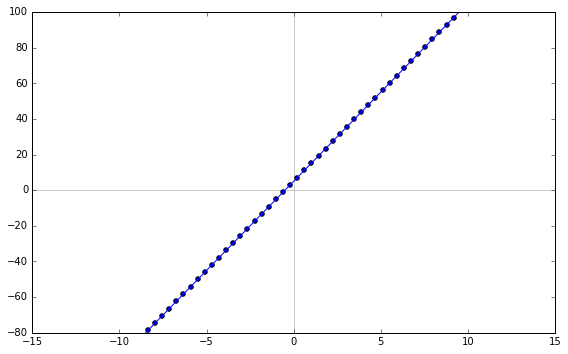

In [4]:
slope_slider = FloatSlider(value=2.0, min=-100., max=100.0, step=5.0)
w = interactive(polynomial, slope=slope_slider)
w

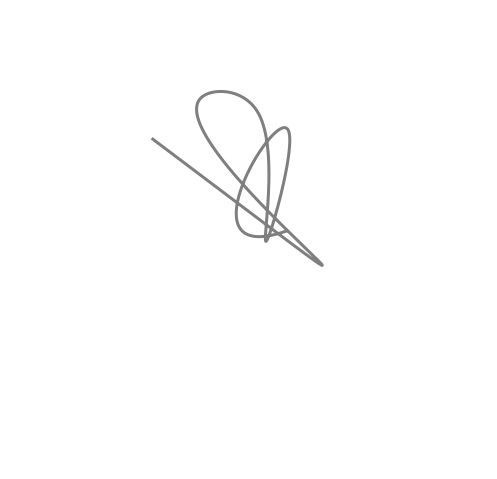

In [5]:
from matplotlib.collections import LineCollection
from scipy import interpolate
def spline_demo(num=14, smooth=0, seed=10, brush_strokes=30, alpha=0.5):
    a = np.random.RandomState(seed=seed)
    x = a.rand(num)
    y = a.rand(num)
    t = np.arange(0, 1.1, .1)
    plt.rcParams['figure.figsize'] = 8,8
    plt.figure()
    for _ in xrange(brush_strokes):
        tck, u = interpolate.splprep([x+a.rand(num)/10.0,y+a.rand(num)/10.0], s=smooth)
        unew = np.arange(0, 1.01, 0.001)
        out = interpolate.splev(unew, tck)
        plt.plot(out[0], out[1], alpha=alpha, c='black', linewidth=3.0)
    plt.xlim(-1., 2.5)
    plt.ylim(-1., 1.5)
    plt.axis('off')

smooth_slider = FloatSlider(value=0, min=0, max=20.0, step=.1)
num_points_slider = IntSlider(value=8, min=4, max=20)
seed_slider = IntSlider(value=4, min=4, max=20)
brush_slider = IntSlider(value=1, min=1, max=20)
alpha_slider = FloatSlider(value=.5, min=0, max=1.0, step=.05)

w=interactive(spline_demo,
              smooth=smooth_slider, 
              num=num_points_slider, 
              seed=seed_slider, 
              brush_strokes=brush_slider,
              alpha=alpha_slider)
w